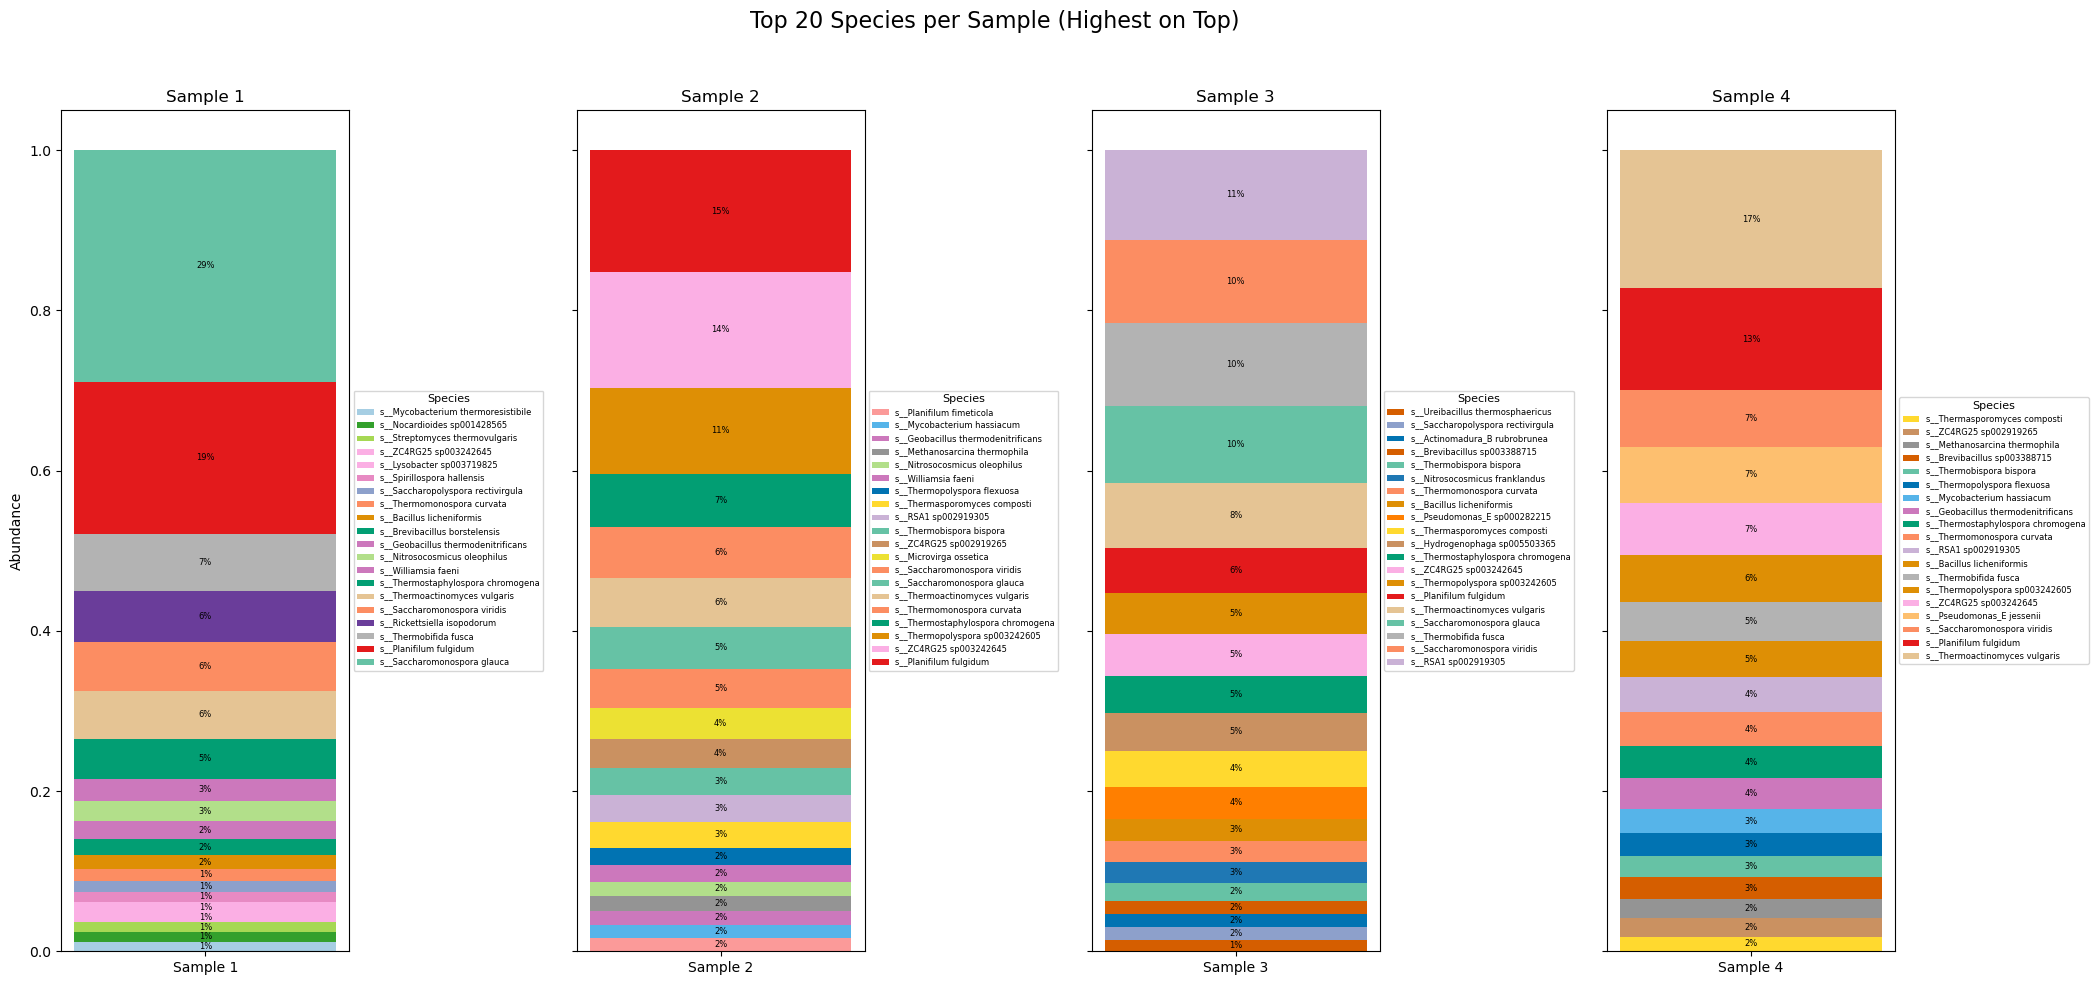

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# List of files and sample names
files = [
    ('barcode13.02.bracken.microb.ncbi.txt', 'Sample 1'),
    ('barcode14.02.bracken.microb.ncbi.txt', 'Sample 2'),
    ('barcode15.02.bracken.microb.ncbi.txt', 'Sample 3'),
    ('barcode16.02.bracken.microb.ncbi.txt', 'Sample 4')
]

# Step 1: Collect all unique species across files
all_species = set()
sample_dfs = []

for filepath, _ in files:
    df = pd.read_csv(filepath, sep='\t')
    df = df.sort_values(by='new_est_reads', ascending=False).head(20)
    all_species.update(df['name'].tolist())
    sample_dfs.append(df)

# Step 2: Generate colorblind-safe palette
# Extend to match total number of unique species
color_palette = (
    sns.color_palette("colorblind", 10) + 
    sns.color_palette("Paired", 10) + 
    sns.color_palette("Set2", 10)
)
color_palette = [color for color in color_palette][:len(all_species)]
species_to_color = {
    species: color_palette[i % len(color_palette)]
    for i, species in enumerate(sorted(all_species))
}

# Step 3: Create plots
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)

for i, (df, (filepath, sample_label)) in enumerate(zip(sample_dfs, files)):
    ax = axes[i]
    df['fractional_new_est_reads'] = df['new_est_reads'] / df['new_est_reads'].sum()
    sample_data = df[['name', 'fractional_new_est_reads']].set_index('name')
    species = sample_data.index.tolist()
    values = sample_data['fractional_new_est_reads'].tolist()

    bottoms = 0
    for sp, val in zip(species[::-1], values[::-1]):  # top-down stacking
        color = species_to_color.get(sp, "#cccccc")  # fallback gray
        bar = ax.bar(0, val, bottom=bottoms, color=color, label=sp)
        ax.text(
            x=bar[0].get_x() + bar[0].get_width() / 2,
            y=bottoms + val / 2,
            s=f'{val:.0%}',
            ha='center',
            va='center',
            fontsize=6,
            color='black'
        )
        bottoms += val

    ax.set_title(sample_label)
    ax.set_xticks([0])
    ax.set_xticklabels([sample_label])
    if i == 0:
        ax.set_ylabel('Abundance')

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.0, 0.5),
        title='Species',
        fontsize=6,
        title_fontsize=8
    )

# Final layout
plt.suptitle('Top 20 Species per Sample (Highest on Top)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.95)
plt.savefig("top20_species_confidence02.png", dpi=300, bbox_inches='tight')
plt.show()

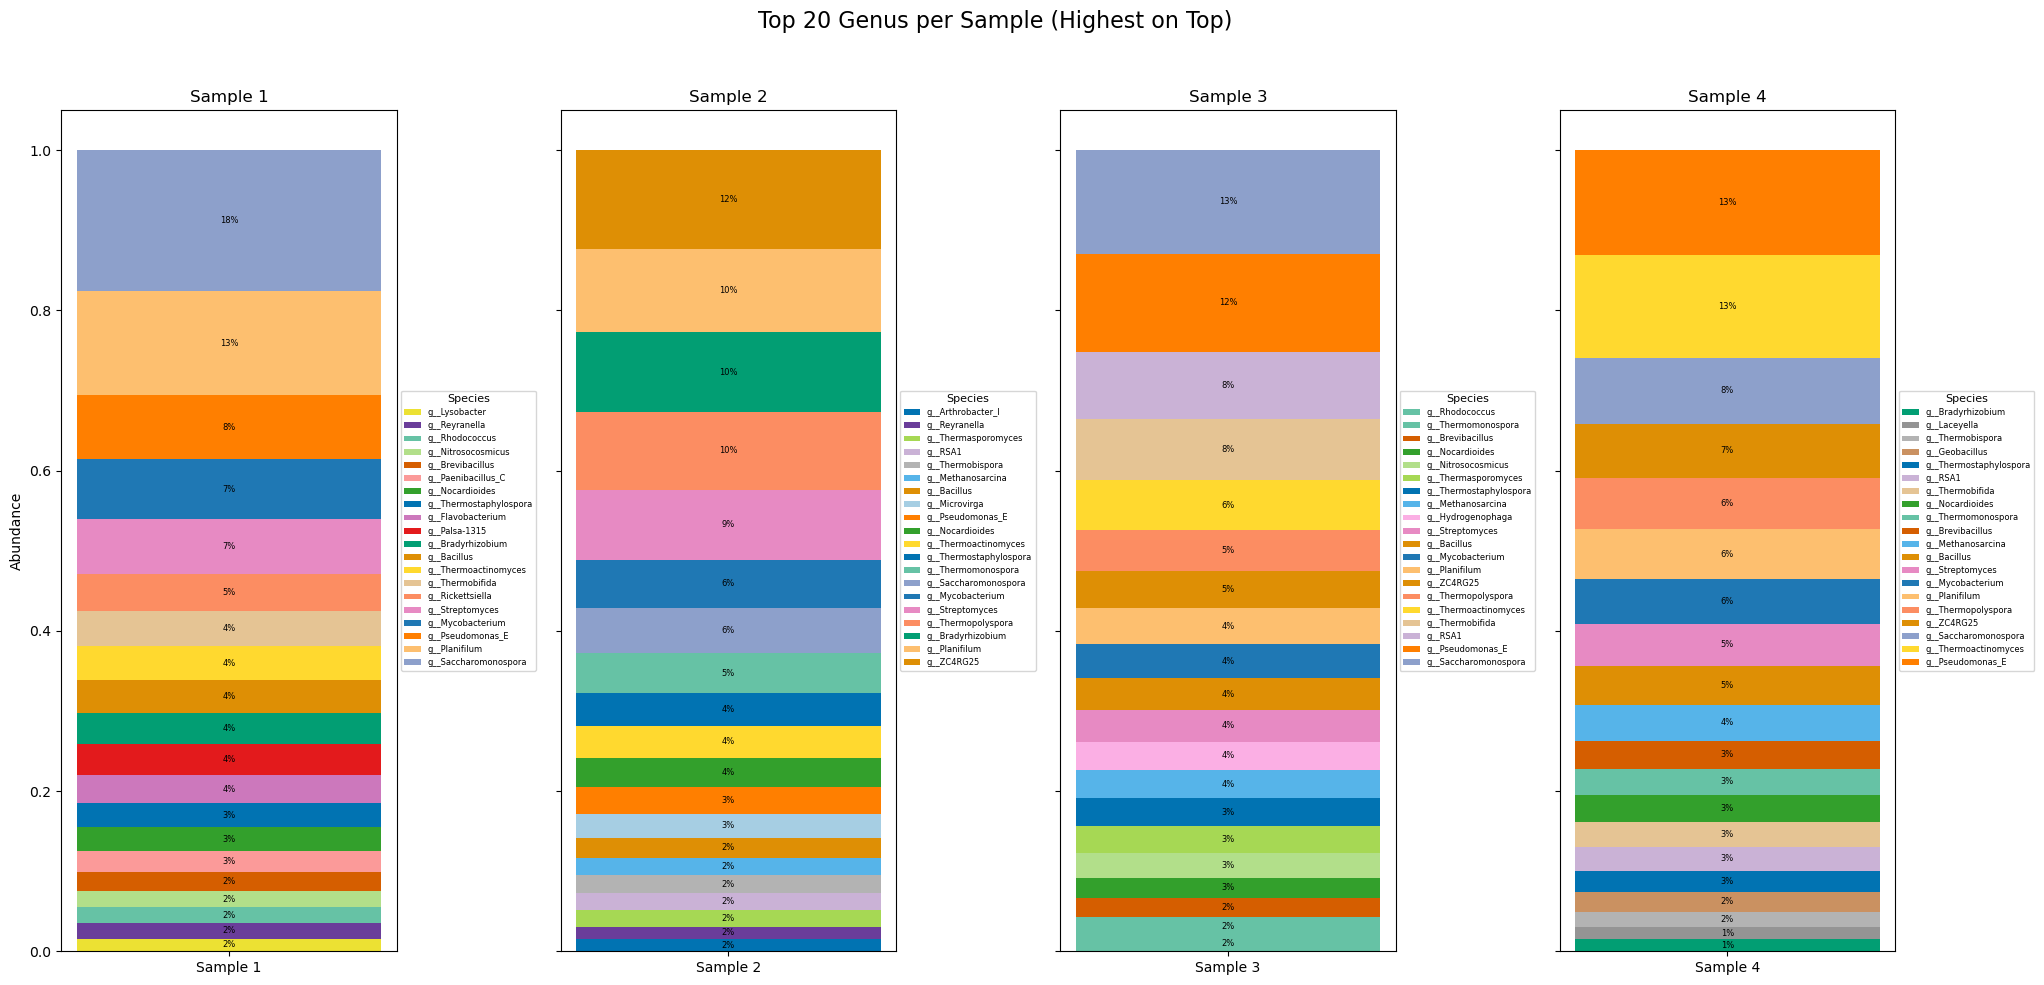

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# List of files and sample names
files = [
    ('barcode13.G02.bracken.microb.txt', 'Sample 1'),
    ('barcode14.G02.bracken.microb.txt', 'Sample 2'),
    ('barcode15.G02.bracken.microb.txt', 'Sample 3'),
    ('barcode16.G02.bracken.microb.txt', 'Sample 4')
]

# Step 1: Collect all unique species across files
all_species = set()
sample_dfs = []

for filepath, _ in files:
    df = pd.read_csv(filepath, sep='\t')
    df = df.sort_values(by='new_est_reads', ascending=False).head(20)
    all_species.update(df['name'].tolist())
    sample_dfs.append(df)

# Step 2: Generate colorblind-safe palette
# Extend to match total number of unique species
color_palette = (
    sns.color_palette("colorblind", 10) + 
    sns.color_palette("Paired", 10) + 
    sns.color_palette("Set2", 10)
)
color_palette = [color for color in color_palette][:len(all_species)]
species_to_color = {
    species: color_palette[i % len(color_palette)]
    for i, species in enumerate(sorted(all_species))
}

# Step 3: Create plots
fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharey=True)

for i, (df, (filepath, sample_label)) in enumerate(zip(sample_dfs, files)):
    ax = axes[i]
    df['fractional_new_est_reads'] = df['new_est_reads'] / df['new_est_reads'].sum()
    sample_data = df[['name', 'fractional_new_est_reads']].set_index('name')
    species = sample_data.index.tolist()
    values = sample_data['fractional_new_est_reads'].tolist()

    bottoms = 0
    for sp, val in zip(species[::-1], values[::-1]):  # top-down stacking
        color = species_to_color.get(sp, "#cccccc")  # fallback gray
        bar = ax.bar(0, val, bottom=bottoms, color=color, label=sp)
        ax.text(
            x=bar[0].get_x() + bar[0].get_width() / 2,
            y=bottoms + val / 2,
            s=f'{val:.0%}',
            ha='center',
            va='center',
            fontsize=6,
            color='black'
        )
        bottoms += val

    ax.set_title(sample_label)
    ax.set_xticks([0])
    ax.set_xticklabels([sample_label])
    if i == 0:
        ax.set_ylabel('Abundance')

    ax.legend(
        loc='center left',
        bbox_to_anchor=(1.0, 0.5),
        title='Species',
        fontsize=6,
        title_fontsize=8
    )

# Final layout
plt.suptitle('Top 20 Genus per Sample (Highest on Top)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88, right=0.95)
plt.savefig("top20_genus_confidence02.png", dpi=300, bbox_inches='tight')
plt.show()